# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


Download the dataset with google drive and load it:

In [1]:
# connect to google drive
from google.colab import drive
import pandas as pd

# mount on google drive
drive.mount('/content/drive')
# unzip
!unzip /content/drive/MyDrive/archive.zip
# import into dataset
df = pd.read_csv('/content/dataset2.csv', engine ='pyarrow')

Mounted at /content/drive
Archive:  /content/drive/MyDrive/archive.zip
  inflating: dataset2.csv            


General information about the dataset

In [2]:

# Number of samples
num_samples = df.shape[0]

# Number of features
num_features = df.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")


# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df.head())



Number of samples: 2864056
Number of features: 33
Example data:
             activityID  heart_rate  hand temperature (°C)  \
0  transient activities       104.0                   30.0   
1  transient activities       104.0                   30.0   
2  transient activities       104.0                   30.0   
3  transient activities       104.0                   30.0   
4  transient activities       104.0                   30.0   

   hand acceleration X ±16g  hand acceleration Y ±16g  \
0                   2.37223                   8.60074   
1                   2.18837                   8.56560   
2                   2.37357                   8.60107   
3                   2.07473                   8.52853   
4                   2.22936                   8.83122   

   hand acceleration Z ±16g  hand gyroscope X  hand gyroscope Y  \
0                   3.51048         -0.092217          0.056812   
1                   3.66179         -0.024413          0.047759   
2                  

## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


In [24]:
import numpy as np
df = pd.read_csv('/content/dataset2.csv', engine ='pyarrow')
# Check for missing values
missing_values = df.isnull().sum()
where_missing = np.where(pd.isnull(df))
print('Where missing values:\n',where_missing, '\n\n')

print('Missing values:')
missing_values


Where missing values:
 (array([ 376417,  376418, 1076250, 1076251, 1076252, 1076253, 1076254,
       1076255, 1076256, 1405826, 1405827, 1405828, 1405829, 1405830,
       1405831, 1405832, 1405833, 1405834, 1405835, 1780609, 1780610,
       1780611, 1780612, 1780613, 1780614, 1780615, 1780616, 1780617,
       2142426, 2142427, 2142428, 2142429, 2142430, 2142431, 2142432,
       2142433, 2142434, 2456025, 2456026, 2456027, 2456028, 2456029,
       2456030, 2456031, 2456032, 2456033]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])) 


Missing values:


activityID                    0
heart_rate                   46
hand temperature (°C)         0
hand acceleration X ±16g      0
hand acceleration Y ±16g      0
hand acceleration Z ±16g      0
hand gyroscope X              0
hand gyroscope Y              0
hand gyroscope Z              0
hand magnetometer X           0
hand magnetometer Y           0
hand magnetometer Z           0
chest temperature (°C)        0
chest acceleration X ±16g     0
chest acceleration Y ±16g     0
chest acceleration Z ±16g     0
chest gyroscope X             0
chest gyroscope Y             0
chest gyroscope Z             0
chest magnetometer X          0
chest magnetometer Y          0
chest magnetometer Z          0
ankle temperature (°C)        0
ankle acceleration X ±16g     0
ankle acceleration Y ±16g     0
ankle acceleration Z ±16g     0
ankle gyroscope X             0
ankle gyroscope Y             0
ankle gyroscope Z             0
ankle magnetometer X          0
ankle magnetometer Y          0
ankle ma

As one can see we only have missing values corresponding the heart rate. So the nans are replaced with the mean of the both neighbours.



In [25]:
# Handling missing values
def fill_missing_value(dataset, missing):
    # find previous which is existent
    for s in missing[1]:
        for i in missing[0]:
            top_variable = np.nan
            bot_variable = np.nan
            l = 1
            while pd.isna(top_variable):
                top_variable = dataset.iloc[i + l, s]
                l += 1

            k = 1
            while pd.isna(bot_variable):
                bot_variable = dataset.iloc[i - k, s]
                k += 1

            # Fill missing value with the mean of top and bottom variables
            dataset.iloc[i, s] = np.mean([top_variable, bot_variable])

    return dataset

# Assuming 'df' is your DataFrame and 'where_missing' is the tuple of row and column indices
df = fill_missing_value(df, where_missing)
missing_values = df.isnull().sum()
missing_values



activityID                   0
heart_rate                   0
hand temperature (°C)        0
hand acceleration X ±16g     0
hand acceleration Y ±16g     0
hand acceleration Z ±16g     0
hand gyroscope X             0
hand gyroscope Y             0
hand gyroscope Z             0
hand magnetometer X          0
hand magnetometer Y          0
hand magnetometer Z          0
chest temperature (°C)       0
chest acceleration X ±16g    0
chest acceleration Y ±16g    0
chest acceleration Z ±16g    0
chest gyroscope X            0
chest gyroscope Y            0
chest gyroscope Z            0
chest magnetometer X         0
chest magnetometer Y         0
chest magnetometer Z         0
ankle temperature (°C)       0
ankle acceleration X ±16g    0
ankle acceleration Y ±16g    0
ankle acceleration Z ±16g    0
ankle gyroscope X            0
ankle gyroscope Y            0
ankle gyroscope Z            0
ankle magnetometer X         0
ankle magnetometer Y         0
ankle magnetometer Z         0
PeopleId

## Feature Distributions



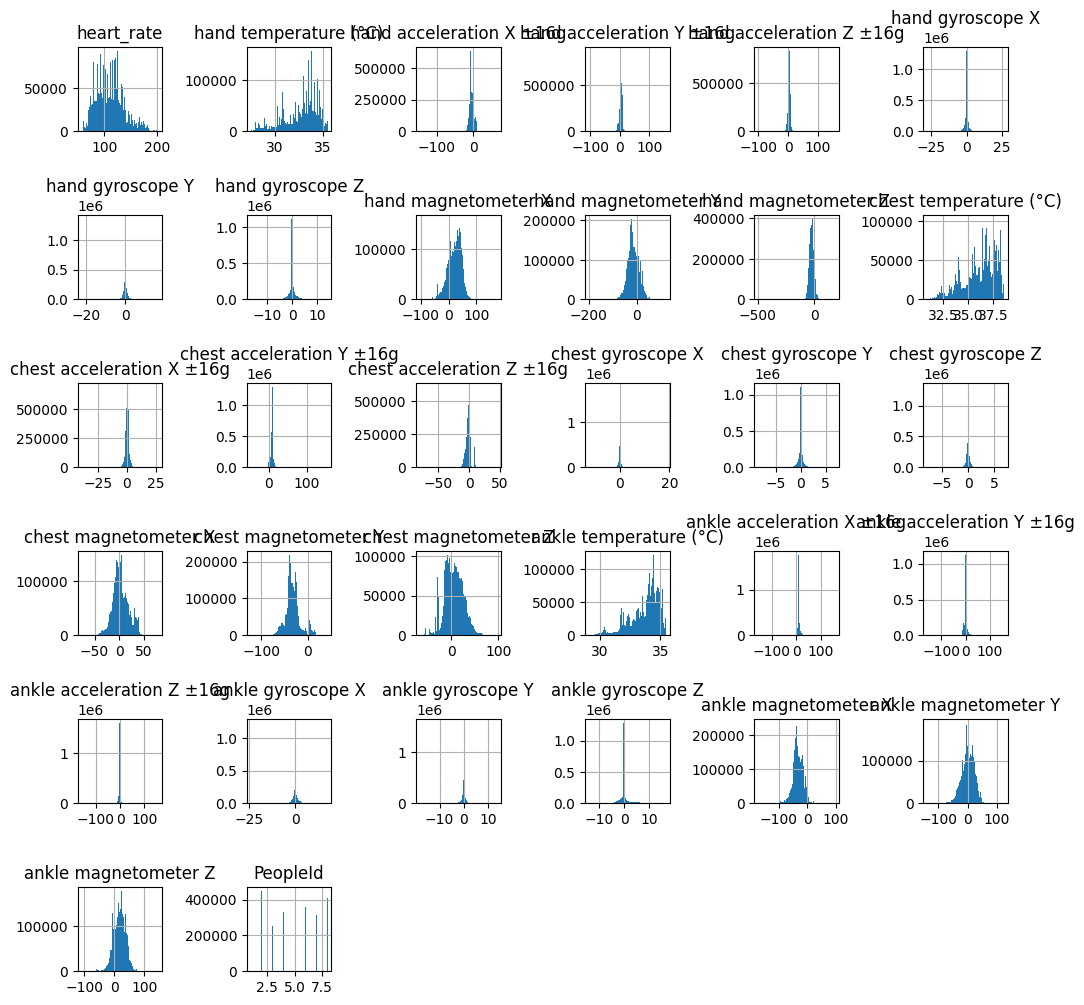

In [33]:
import matplotlib.pyplot as plt
# Example: Plotting histograms of all numerical features
df.hist(figsize=(12, 12), bins = 100)
plt.subplots_adjust(wspace=1, hspace=1)
plt.show()


## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]


<Axes: xlabel='PeopleId', ylabel='count'>

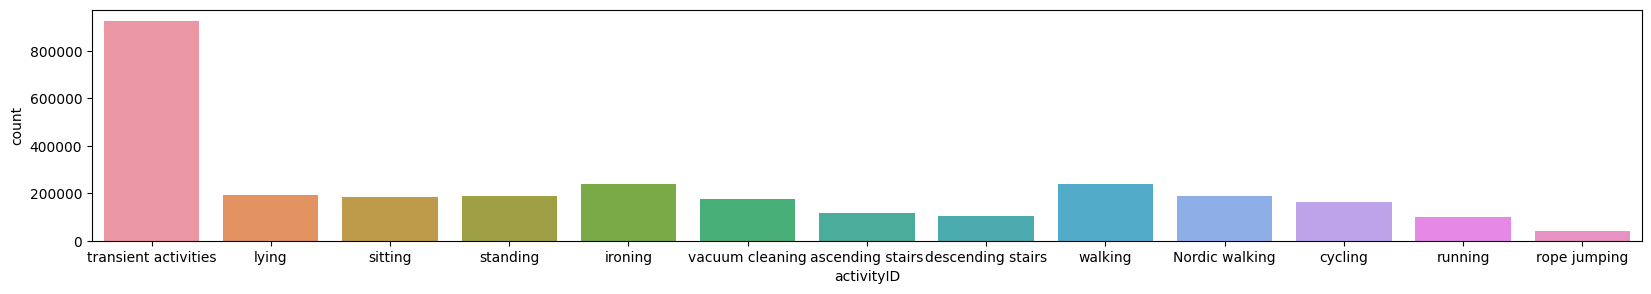

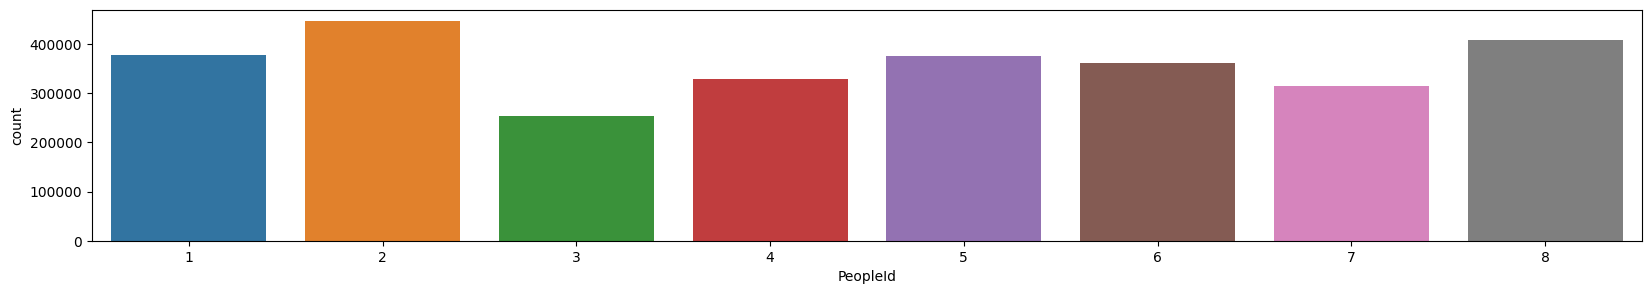

In [42]:
import seaborn as sns

# Example: Checking for class imbalance in a classification problem
plt.figure(figsize=(20,3))
sns.countplot(x='activityID', data=df)

plt.figure(figsize=(20,3))
sns.countplot(x='PeopleId', data=df)




One can see that 8 people did the same tasks in the same order. So ne network would just memorize the order and the dureation of the tasks

Time series plot of all variables

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# Assuming 't' is your time array
plt.close()
# Example list of 13 distinct colors
colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#1a1a1a", "#ff0000", "#00ff00"
]

df['t'] = np.array([0.01 * i for i in range(len(df))])

# Iterate over columns and plot each activity with a different color
for column in df.columns[1:]:
    plt.figure(figsize=(20, 7))
    for i, activity_id in enumerate(np.unique(df['activityID'])):
        activity_df = df[(df['activityID'] == activity_id) & (df['t'] < 4000)]
        plt.scatter(activity_df['t'], activity_df[column], s=1, c=colors[i], label=f'Activity {activity_id}')

    plt.title(f'Time Series for {column}')
    plt.legend()
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


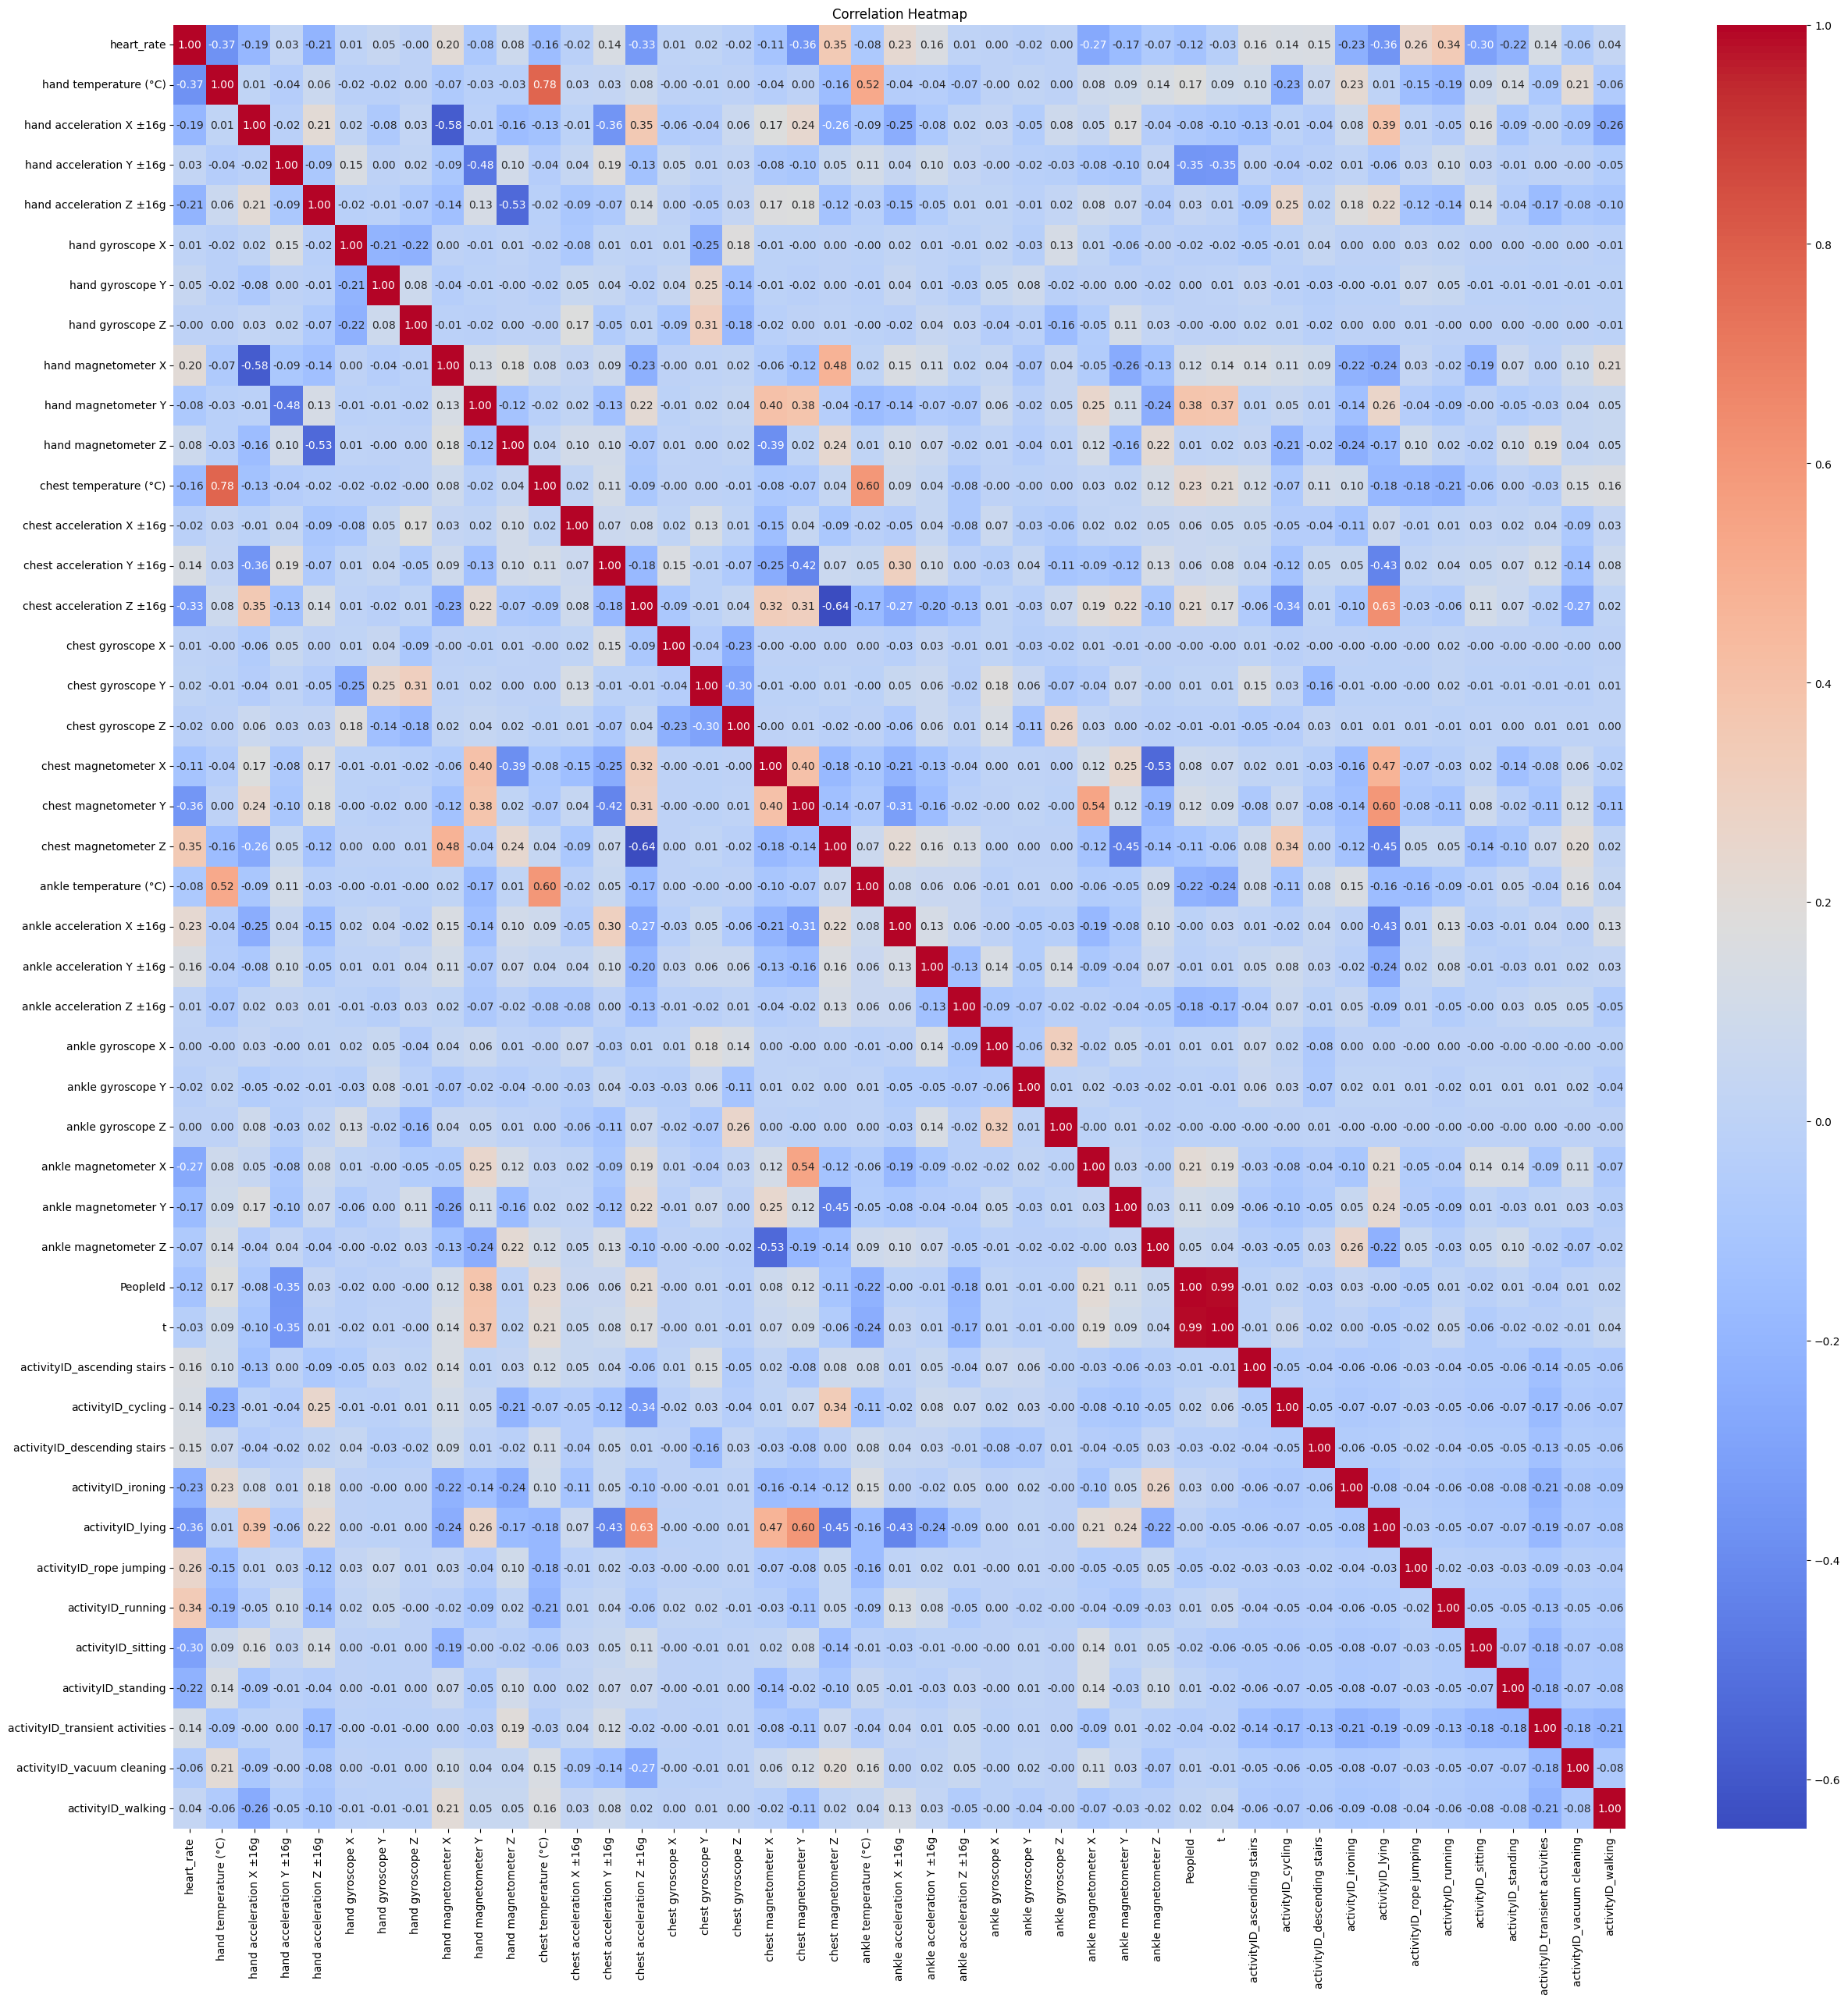

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Encode categorical variable using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['activityID'], drop_first=True)

plt.figure(figsize=(30, 30))

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()
